In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [2]:
import os
import torch
import torchaudio
import pandas as pd
from tqdm import tqdm

# Create an empty list to store the data

def getcsv(N_FFT,root_folder):
    data = []
    #Loop through the 'real' and 'fake' subfolders
    for label in ['real', 'fake']:
        label_folder = os.path.join(root_folder, label)

        # Check if the folder exists
        if not os.path.exists(label_folder):
                continue

            # Loop through the audio files in each subfolder
        for filename in tqdm(os.listdir(root_folder)):
            if filename.endswith('.wav'):  # Adjust the file extension to match your audio files
                file_path = os.path.join(root_folder, filename)
                
                # Load the audio file using torchaudio
                waveform, sample_rate = torchaudio.load(file_path)

                # Extract MFCC features
                mfcc_transform = torchaudio.transforms.MFCC(
                    sample_rate=sample_rate,
                    n_mfcc=N_FFT  # You can adjust the number of coefficients here
                )
                mfccs = mfcc_transform(waveform)

                # Calculate mean along time axis
                mfccs = mfccs.mean(dim=2).squeeze().numpy()

                # Append the file path, label, and MFCC features to the data list
               
                
                data.append({'audio_file': file_path, 'label': label, 'mfcc': mfccs.tolist()})

    # Assuming 'df' has an 'mfcc' column with MFCC lists
    data = pd.DataFrame(data)
    df_expanded = pd.DataFrame(data['mfcc'].tolist())

    # # Combine the expanded MFCC columns with the original DataFrame
    df_expanded = pd.concat([data[['label']], df_expanded], axis=1)

    # The 'df_expanded' DataFrame now has each MFCC value in its own column



    return df_expanded

c:\Users\aa\anaconda3\envs\ML\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\aa\anaconda3\envs\ML\lib\site-packages\torchaudio\extension\extension.py:13: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')


In [3]:
# import os
# import torch
# import torchaudio
# import pandas as pd

# # Create an empty list to store the data

# def getcsv(N_FFT,root_folder):
#     data = []
#     # Loop through the 'real' and 'fake' subfolders
#     for label in ['real', 'fake']:
#         label_folder = os.path.join(root_folder, label)

#         # Check if the folder exists
#         if not os.path.exists(label_folder):
#             continue

#         # Loop through the audio files in each subfolder
#         for filename in os.listdir(label_folder):
#             if filename.endswith('.wav'):  # Adjust the file extension to match your audio files
#                 file_path = os.path.join(label_folder, filename)
                
#                 # Load the audio file using torchaudio
#                 waveform, sample_rate = torchaudio.load(file_path)

#                 # Extract MFCC features
#                 mfcc_transform = torchaudio.transforms.MFCC(
#                     sample_rate=sample_rate,
#                     n_mfcc=N_FFT  # You can adjust the number of coefficients here
#                 )
#                 mfccs = mfcc_transform(waveform)

#                 # Calculate mean along time axis
#                 mfccs = mfccs.mean(dim=2).squeeze().numpy()

#                 # Append the file path, label, and MFCC features to the data list
#                 data.append({'audio_file': file_path, 'label': label, 'mfcc': mfccs.tolist()})

#         # Assuming 'df' has an 'mfcc' column with MFCC lists
#     data = pd.DataFrame(data)
#     df_expanded = pd.DataFrame(data['mfcc'].tolist())

#     # Combine the expanded MFCC columns with the original DataFrame
#     df_expanded = pd.concat([data[['label']], df_expanded], axis=1)

#     # The 'df_expanded' DataFrame now has each MFCC value in its own column

#     df_expanded.to_csv(f"df_{N_FFT}f",index=False)
        

In [4]:
# data_train = pd.read_csv("data set\\spliting data\\train part_1.csv")





data_train_1 = pd.read_csv("data set - Copy\\spliting data\\train part_1.csv")
data_train_2 = pd.read_csv("data set - Copy\\spliting data\\train part_2.csv")
data_train_3 = pd.read_csv("data set - Copy\\spliting data\\train part_3.csv")
data_train_4 = pd.read_csv("data set - Copy\\spliting data\\train part_4.csv")
data_train_5 = pd.read_csv("data set - Copy\\spliting data\\train part_5.csv")





data_train=pd.concat([data_train_1, data_train_2,data_train_3,data_train_4,data_train_5], axis=0)




data_test= pd.read_csv("data set - Copy\\spliting data\\all_test.csv")
data_val= pd.read_csv("data set - Copy\\spliting data\\all_val.csv")

data_train = data_train.sample(frac=1).reset_index(drop=True)
data_test = data_test.sample(frac=1).reset_index(drop=True)
data_val = data_val.sample(frac=1).reset_index(drop=True)



In [5]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,real,-332.500641,55.685139,-24.439373,-12.552845,-24.678391,-35.402126,-26.558245,-9.742828,-7.916339,...,13.827679,10.568702,5.884167,0.252982,-6.132975,-10.309450,-13.637476,-15.189514,-13.822941,-10.828931
1,fake,-292.280304,29.275543,-21.152412,-12.982358,-29.997459,-30.898167,-27.018322,-12.141772,-19.874840,...,15.258393,11.363038,6.064743,-0.163534,-7.074747,-11.220066,-15.356668,-16.279778,-14.666589,-11.242043
2,fake,-322.437256,38.556843,-17.623169,-4.445272,-35.360840,-32.274921,-28.029619,-18.044884,-15.102872,...,16.973753,12.621364,7.049394,0.010275,-6.740716,-12.094120,-16.098505,-17.431597,-16.349201,-12.696413
3,fake,-339.695312,64.885612,-16.442955,-15.746943,-25.508924,-36.931190,-17.144106,-14.908381,-18.528433,...,12.978127,9.812355,5.271039,-0.214998,-6.201591,-10.281126,-13.693928,-14.755504,-13.812722,-11.143857
4,fake,-285.846863,13.839002,-12.953707,-0.905494,-34.285255,-35.953064,-28.334850,-19.376394,-15.025783,...,14.970060,11.375276,5.694726,-0.700779,-7.407430,-12.055461,-15.822521,-16.786556,-15.350148,-11.625834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126124,fake,-312.641846,40.023018,-19.822298,-10.492544,-33.910156,-33.902744,-28.821836,-13.083502,-8.777969,...,14.299991,11.133281,5.976243,0.081449,-6.111386,-10.643298,-14.699288,-15.888203,-14.739773,-11.581569
126125,fake,-311.440063,28.849352,-24.922964,-11.719191,-25.699955,-35.267120,-27.736013,-14.889694,-11.926208,...,12.413036,9.257350,4.708735,-0.614765,-6.398185,-10.284198,-13.376821,-14.543844,-13.344929,-10.307158
126126,fake,-308.698608,40.334354,-29.883625,-19.511129,-27.902754,-30.342567,-35.952507,-18.250479,-16.945938,...,15.656582,11.802045,6.446570,0.129486,-6.232423,-11.307760,-15.079250,-16.753677,-15.658273,-11.922606
126127,fake,-317.458282,29.057283,1.731500,3.949694,-38.441769,-36.166126,-24.673281,-16.899370,-11.075484,...,15.887320,12.412897,6.765454,0.315404,-6.472437,-11.477100,-15.795135,-17.001087,-15.733283,-12.500335


## Encoding the label feature

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
def encodeing(row):
    if row == "real":
      row = 1
    else :
      row =0
    return row

In [8]:
count = data_train['label'].value_counts()
print(count)

fake    107413
real     18716
Name: label, dtype: int64


In [9]:
# Assuming 'data' is your DataFrame
X_train = data_train.drop(columns='label').values  # Features
y_train = np.array(data_train['label'].values)  # Labels


X_val = data_val.drop(columns='label').values  # Features
y_val = np.array(data_val['label'].values)  # Labels



X_test = data_test.drop(columns='label').values  # Features
y_test = np.array(data_test['label'].values)  # Labels


# Assuming 'data' is your DataFrame
label_encoder = LabelEncoder()

# Apply label encoding to 'label' column
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# Print the mapping of encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)


Label Encoding Mapping:
{'fake': 0, 'real': 1}


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print the mapping of encoded values
label_mapping = {'fake': 0, 'real': 1}
print("Label Encoding Mapping:")
print(label_mapping)


# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Label Encoding Mapping:
{'fake': 0, 'real': 1}


## XGBOOST

In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier()

# Train the model on the training set
xgb_classifier.fit(X_train, y_train)

# Predictions on validation and test sets
y_pred_val = xgb_classifier.predict(X_val)
y_pred_test = xgb_classifier.predict(X_test)

# Calculate accuracy on validation and test sets
accuracy_val = accuracy_score(y_val, y_pred_val)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f'Accuracy on Validation Set: {accuracy_val:.4f}')
print(f'Accuracy on Test Set: {accuracy_test:.4f}')

Accuracy on Validation Set: 0.9570
Accuracy on Test Set: 0.9574


In [12]:
# Classification report on test set
print('\nClassification Report - val Set:')
print(classification_report(y_val, y_pred_val))
# Classification report on test set
print('\nClassification Report - Test Set:')
print(classification_report(y_test, y_pred_test))


Classification Report - val Set:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     13427
           1       0.95      0.75      0.84      2340

    accuracy                           0.96     15767
   macro avg       0.95      0.87      0.91     15767
weighted avg       0.96      0.96      0.95     15767


Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     13426
           1       0.95      0.75      0.84      2339

    accuracy                           0.96     15765
   macro avg       0.96      0.87      0.91     15765
weighted avg       0.96      0.96      0.96     15765



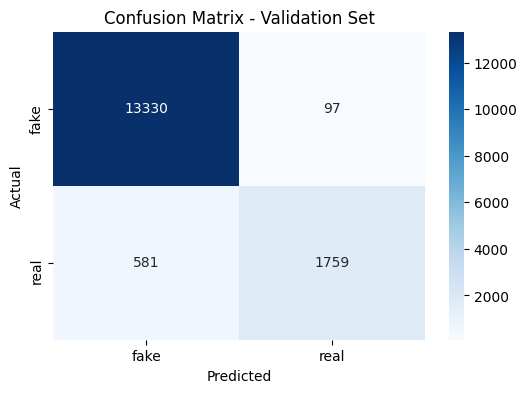

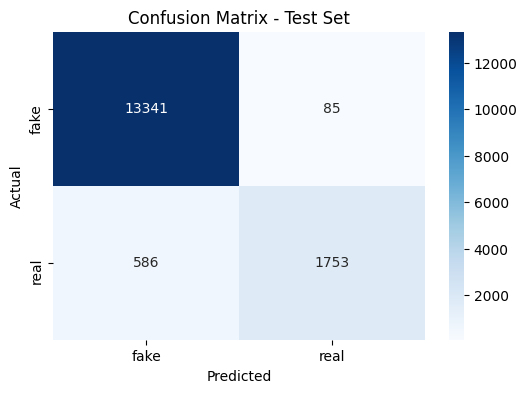

In [13]:

# Plot confusion matrix for validation set
plot_confusion_matrix(y_val, y_pred_val, title='Confusion Matrix - Validation Set')

# Plot confusion matrix for test set
plot_confusion_matrix(y_test, y_pred_test, title='Confusion Matrix - Test Set')


## ExtraTree 

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Extra Trees Classifier
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
extra_trees.fit(X_train, y_train)

# Predictions on validation and test sets
y_pred_val = extra_trees.predict(X_val)
y_pred_test = extra_trees.predict(X_test)

# Calculate accuracy on validation and test sets
accuracy_val = accuracy_score(y_val, y_pred_val)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f'Accuracy on Validation Set: {accuracy_val:.4f}')
print(f'Accuracy on Test Set: {accuracy_test:.4f}')



Accuracy on Validation Set: 0.9211
Accuracy on Test Set: 0.9193


In [15]:
# Classification report on test set
print('\nClassification Report - val Set:')
print(classification_report(y_val, y_pred_val))
# Classification report on test set
print('\nClassification Report - Test Set:')
print(classification_report(y_test, y_pred_test))


Classification Report - val Set:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13427
           1       1.00      0.47      0.64      2340

    accuracy                           0.92     15767
   macro avg       0.96      0.73      0.80     15767
weighted avg       0.93      0.92      0.91     15767


Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     13426
           1       1.00      0.46      0.63      2339

    accuracy                           0.92     15765
   macro avg       0.96      0.73      0.79     15765
weighted avg       0.93      0.92      0.91     15765



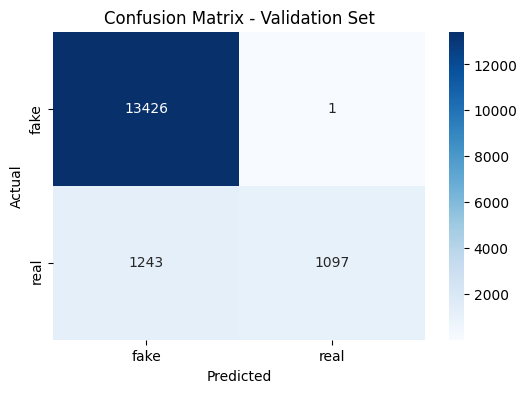

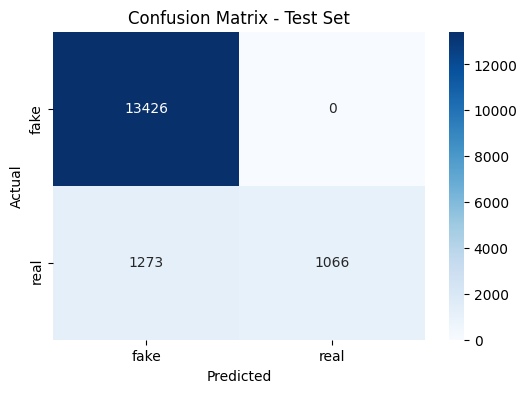

In [16]:

# Plot confusion matrix for validation set
plot_confusion_matrix(y_val, y_pred_val, title='Confusion Matrix - Validation Set')

# Plot confusion matrix for test set
plot_confusion_matrix(y_test, y_pred_test, title='Confusion Matrix - Test Set')


## LSTM

In [17]:
# Assuming 'data' is your DataFrame
X_train = data_train.drop(columns='label').values  # Features
y_train = np.array(data_train['label'].values)  # Labels
y_train = pd.get_dummies(y_train)



X_val = data_val.drop(columns='label').values  # Features
y_val = np.array(data_val['label'].values)  # Labels
y_val = pd.get_dummies(y_val)



X_test = data_test.drop(columns='label').values  # Features
y_test = np.array(data_test['label'].values)  # Labels
y_test = pd.get_dummies(y_test)


In [18]:
import tensorflow as tf
# Reshape the data to match the LSTM input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [19]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Initialize a Sequential model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(256, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model.add(Dense(128, activation='relu'))

# Add an additional Dense layer with 64 units and relu activation
model.add(Dense(64, activation='relu'))

# Add an additional Dense layer with 32 units and relu activation
model.add(Dense(32, activation='relu'))


# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/20
3942/3942 [==============================] - 34s 8ms/step - loss: 0.2770 - accuracy: 0.9162 - val_loss: 0.2636 - val_accuracy: 0.9197
Epoch 2/20
3942/3942 [==============================] - 32s 8ms/step - loss: 0.2714 - accuracy: 0.9165 - val_loss: 0.2613 - val_accuracy: 0.9197
Epoch 3/20
3942/3942 [==============================] - 32s 8ms/step - loss: 0.2704 - accuracy: 0.9165 - val_loss: 0.2607 - val_accuracy: 0.9197
Epoch 4/20
3942/3942 [==============================] - 32s 8ms/step - loss: 0.2690 - accuracy: 0.9165 - val_loss: 0.2609 - val_accuracy: 0.9197
Epoch 5/20
3942/3942 [==============================] - 32s 8ms/step - loss: 0.2674 - accuracy: 0.9165 - val_loss: 0.2698 - val_accuracy: 0.9198
Epoch 6/20
3942/3942 [==============================] - 33s 8ms/step - loss: 0.2588 - accuracy: 0.9165 - val_loss: 0.2408 - val_accuracy: 0.9198
Epoch 7/20
3942/3942 [==============================] - 34s 9ms/step - loss: 0.2341 - accuracy: 0.9178 - val_loss: 0.1572 - val_ac

In [20]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

493/493 - 2s - loss: 0.0434 - accuracy: 0.9852 - 2s/epoch - 4ms/step
Test Accuracy: 98.52%


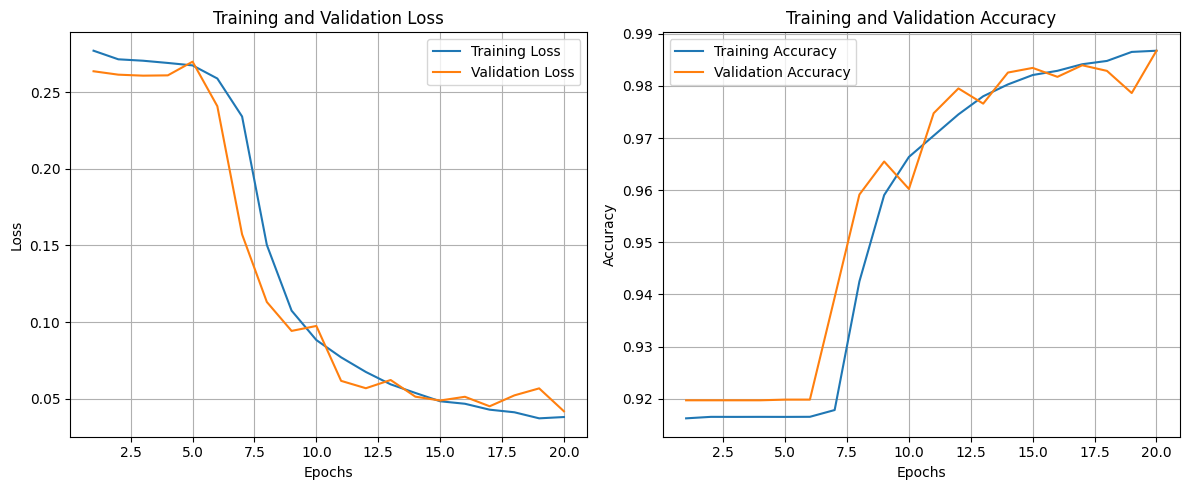

In [21]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

493/493 [==============================] - 2s 3ms/step
Test f1_score : 95.15%


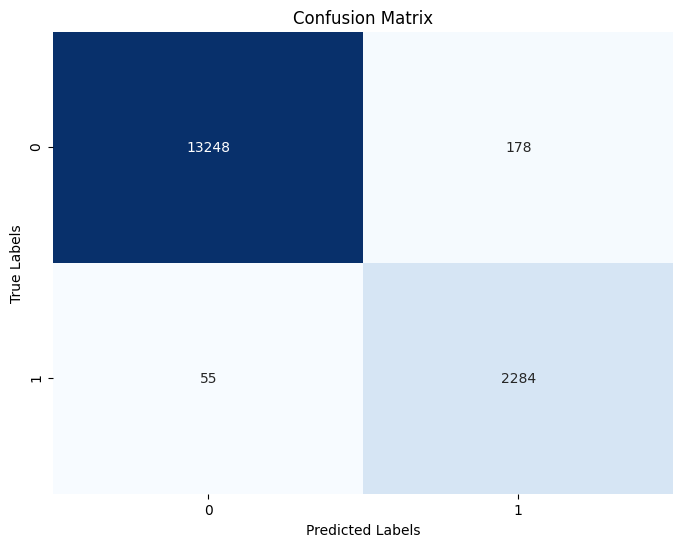

In [22]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test), axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## MFCC and 1CNN and PLDA 

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Assuming X_train, X_val, y_train, y_val are already prepared

# Reshape the data to match the CNN input shape
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_cnn = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
# Early stopping callback
callback = EarlyStopping(monitor='val_loss', patience=20)

# Initialize a Sequential model
model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='tanh', input_shape=(X_train_cnn.shape[1], 1)))

# Add a max pooling layer
# model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

model.add(Dense(256, activation='relu'))


# Add a fully connected layer
model.add(Dense(128, activation='relu'))

# Add an additional Dense layer with 32 units and relu activation
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_data=(X_val_cnn, y_val), callbacks=[callback])


Epoch 1/20
3942/3942 [==============================] - 21s 5ms/step - loss: 0.2022 - accuracy: 0.9295 - val_loss: 0.1383 - val_accuracy: 0.9491
Epoch 2/20
3942/3942 [==============================] - 19s 5ms/step - loss: 0.1060 - accuracy: 0.9614 - val_loss: 0.0839 - val_accuracy: 0.9710
Epoch 3/20
3942/3942 [==============================] - 19s 5ms/step - loss: 0.0784 - accuracy: 0.9717 - val_loss: 0.0619 - val_accuracy: 0.9785
Epoch 4/20
3942/3942 [==============================] - 19s 5ms/step - loss: 0.0666 - accuracy: 0.9760 - val_loss: 0.0555 - val_accuracy: 0.9808
Epoch 5/20
3942/3942 [==============================] - 19s 5ms/step - loss: 0.0575 - accuracy: 0.9798 - val_loss: 0.0460 - val_accuracy: 0.9844
Epoch 6/20
3942/3942 [==============================] - 19s 5ms/step - loss: 0.0504 - accuracy: 0.9820 - val_loss: 0.0477 - val_accuracy: 0.9841
Epoch 7/20
3942/3942 [==============================] - 19s 5ms/step - loss: 0.0468 - accuracy: 0.9830 - val_loss: 0.0437 - val_ac

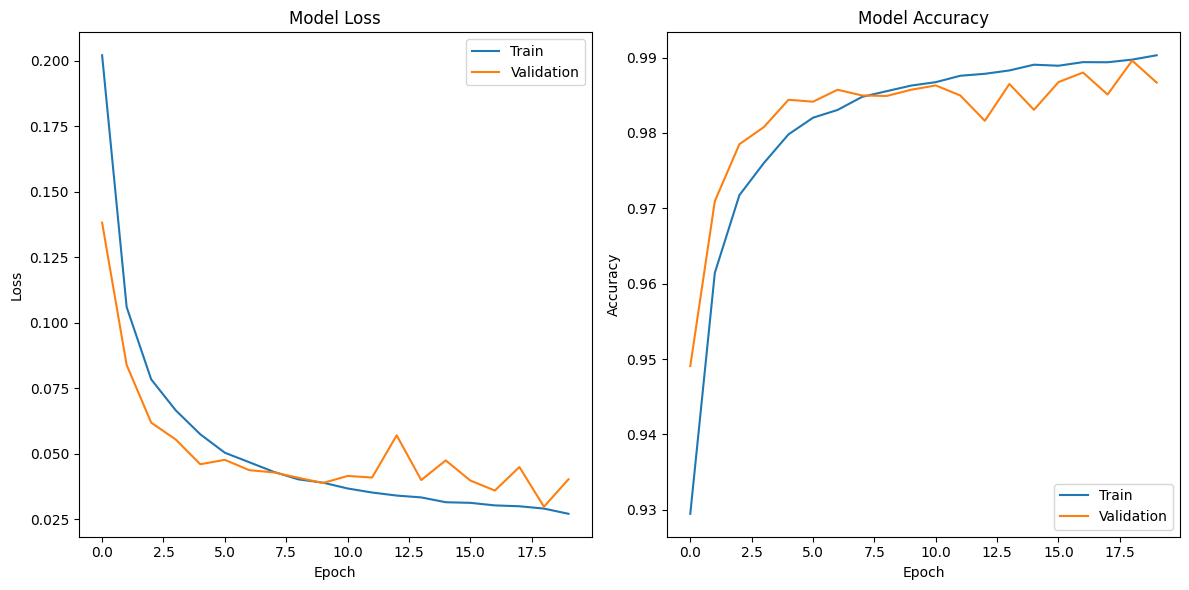

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()


493/493 [==============================] - 1s 2ms/step
Test f1_score : 95.73%


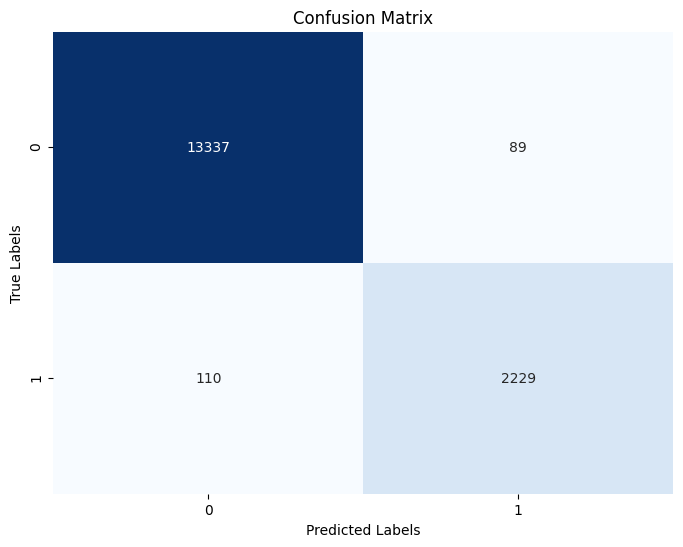

In [25]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test), axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## RAWNET

In [26]:
# Assuming 'data' is your DataFrame
X_train = data_train.drop(columns='label').values  # Features
y_train = np.array(data_train['label'].values)  # Labels



X_val = data_val.drop(columns='label').values  # Features
y_val = np.array(data_val['label'].values)  # Labels



X_test = data_test.drop(columns='label').values  # Features
y_test = np.array(data_test['label'].values)  # Labels


In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, MaxPooling1D, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming X_train, X_val, y_train, y_val are already prepared

# Reshape the data to match the RawNet input shape
X_train_rawnet = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_rawnet = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_rawnet = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Label encoding for binary classification
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)
# Early stopping callback
# callback = EarlyStopping(monitor='val_loss', patience=20)

# RawNet 2 architecture
def rawnet_2(input_shape):
    inputs = Input(shape=input_shape)

    # Convolutional Blocks
    x = Conv1D(filters=64, kernel_size=7, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size=3)(x)

    x = Conv1D(filters=128, kernel_size=5, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size=3)(x)

    x = Conv1D(filters=256, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size=3)(x)

    # Residual Block
    residual = Conv1D(filters=256, kernel_size=1, strides=1, padding='same')(x)
    x = Conv1D(filters=256, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv1D(filters=256, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.add([x, residual])
    x = Activation('relu')(x)

    # Global Average Pooling and Dense Layers
    x = GlobalAveragePooling1D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)

    # Output Layer
    outputs = Dense(2, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    return model

# Build RawNet 2 model
rawnet2_model = rawnet_2((X_train_rawnet.shape[1], 1))

# Compile the model
rawnet2_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = rawnet2_model.fit(X_train_rawnet, y_train_encoded, epochs=20, batch_size=32, 
                             validation_data=(X_val_rawnet, y_val_encoded))


Epoch 1/20
3942/3942 [==============================] - 67s 17ms/step - loss: 0.1555 - accuracy: 0.9419 - val_loss: 0.4873 - val_accuracy: 0.9203
Epoch 2/20
3942/3942 [==============================] - 66s 17ms/step - loss: 0.1011 - accuracy: 0.9617 - val_loss: 0.1146 - val_accuracy: 0.9550
Epoch 3/20
3942/3942 [==============================] - 67s 17ms/step - loss: 0.0853 - accuracy: 0.9677 - val_loss: 1.9944 - val_accuracy: 0.4075
Epoch 4/20
3942/3942 [==============================] - 66s 17ms/step - loss: 0.0752 - accuracy: 0.9718 - val_loss: 0.0579 - val_accuracy: 0.9792
Epoch 5/20
3942/3942 [==============================] - 66s 17ms/step - loss: 0.0606 - accuracy: 0.9775 - val_loss: 0.3239 - val_accuracy: 0.8602
Epoch 6/20
3942/3942 [==============================] - 67s 17ms/step - loss: 0.0495 - accuracy: 0.9821 - val_loss: 0.0931 - val_accuracy: 0.9615
Epoch 7/20
3942/3942 [==============================] - 68s 17ms/step - loss: 0.0419 - accuracy: 0.9851 - val_loss: 0.1278 -

493/493 [==============================] - 2s 5ms/step


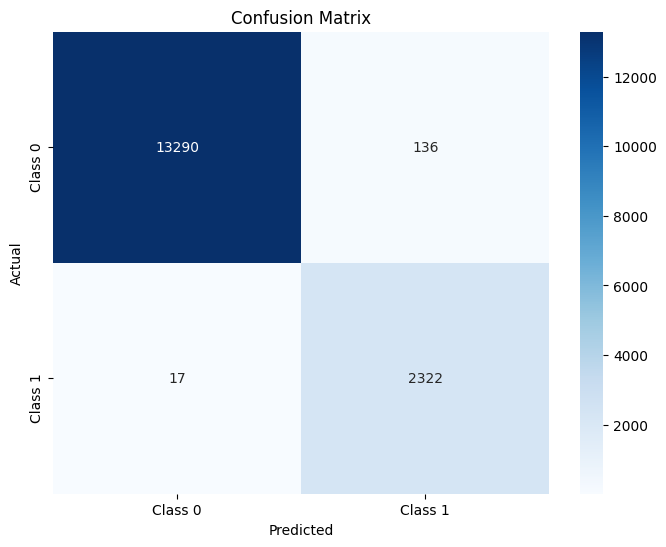

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     13426
           1       0.94      0.99      0.97      2339

    accuracy                           0.99     15765
   macro avg       0.97      0.99      0.98     15765
weighted avg       0.99      0.99      0.99     15765



In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Assuming rawnet2_model is already trained

# Predictions on the test set
y_pred = np.argmax(rawnet2_model.predict(X_test_rawnet), axis=1)

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test_encoded, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test_encoded, y_pred))


In [29]:
rawnet2_model.save("rawnet2_model.h5")

In [30]:
import pickle

with open("rawnet2_model.pkl", "wb") as f:
 pickle.dump(rawnet2_model, f)

INFO:tensorflow:Assets written to: ram://c045de70-4560-408c-b885-f906288e14a8/assets


INFO:tensorflow:Assets written to: ram://c045de70-4560-408c-b885-f906288e14a8/assets


In [31]:
from tensorflow.keras.models import load_model
model_S = load_model('rawnet2_model.h5')

In [32]:
X_train_rawnet[0].shape

(100, 1)

In [33]:
X_test_rawnet[0].tolist()

[[-326.8517761230469],
 [56.68025970458984],
 [-13.655732154846191],
 [-11.583237648010254],
 [-29.555944442749023],
 [-37.49750900268555],
 [-23.163469314575195],
 [-15.602775573730469],
 [-18.629711151123047],
 [10.732805252075195],
 [-7.503445625305176],
 [1.208025574684143],
 [-14.116158485412598],
 [-2.5734126567840576],
 [-4.369596481323242],
 [-12.159256935119627],
 [-8.7030668258667],
 [-5.6990461349487305],
 [-1.1102041006088257],
 [-2.900129795074463],
 [-3.1974754333496094],
 [0.6693426966667175],
 [-2.2366857528686523],
 [-2.603670597076416],
 [-3.9690754413604736],
 [-5.196455001831055],
 [-10.117542266845703],
 [-2.676569700241089],
 [-5.869694232940674],
 [-1.155422925949097],
 [-0.485637903213501],
 [1.0248117446899414],
 [0.6392291784286499],
 [3.3995165824890137],
 [2.3663480281829834],
 [4.947169303894043],
 [-2.1752946376800537],
 [-1.99038827419281],
 [-5.485959529876709],
 [-5.587216854095459],
 [-6.915684700012207],
 [-6.530065536499023],
 [-6.938069343566895],
 

In [34]:
model_S.predict(X_test_rawnet[9].reshape(1,100,1))

1/1 [==============================] - 0s 436ms/step


array([[1.       , 0.9954601]], dtype=float32)

In [35]:
import os
import torch
import torchaudio
import pandas as pd
from tqdm import tqdm

# Create an empty list to store the data

def getcsv(N_FFT,root_folder):
    data = []
    # Loop through the 'real' and 'fake' subfolders
    # for label in ['real', 'fake']:
    #     label_folder = os.path.join(root_folder, label)

    #     # Check if the folder exists
    #     if not os.path.exists(label_folder):
    #         continue

    #     # Loop through the audio files in each subfolder
    for filename in tqdm(os.listdir(root_folder)):
        if filename.endswith('.wav'):  # Adjust the file extension to match your audio files
            file_path = os.path.join(root_folder, filename)
            
            # Load the audio file using torchaudio
            waveform, sample_rate = torchaudio.load(file_path)

            # Extract MFCC features
            mfcc_transform = torchaudio.transforms.MFCC(
                sample_rate=sample_rate,
                n_mfcc=N_FFT  # You can adjust the number of coefficients here
            )
            mfccs = mfcc_transform(waveform)

            # Calculate mean along time axis
            mfccs = mfccs.mean(dim=2).squeeze().numpy()

            # Append the file path, label, and MFCC features to the data list
            data.append({'mfcc': mfccs.tolist()})

    # Assuming 'df' has an 'mfcc' column with MFCC lists
    data = pd.DataFrame(data)
    df_expanded = pd.DataFrame(data['mfcc'].tolist())

    # # Combine the expanded MFCC columns with the original DataFrame
    # df_expanded = pd.concat([data[['label']], df_expanded], axis=1)

    # # The 'df_expanded' DataFrame now has each MFCC value in its own column

    # df_expanded.to_csv(f"df_{N_FFT}f",index=False)

    return df_expanded

In [36]:
df=getcsv(100,"D:\\generated_audio\\generated_audio\\data set all\\fake")

  0%|          | 0/134266 [00:00<?, ?it/s]c:\Users\aa\anaconda3\envs\ML\lib\site-packages\torchaudio\functional\functional.py:358: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  "At least one mel filterbank has all zero values. "
100%|██████████| 134266/134266 [19:36<00:00, 114.15it/s]


In [37]:
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-338.325775,38.084110,-30.652552,-18.416483,-20.777180,-11.792726,-21.028019,1.154024,-14.435788,-0.404240,...,-4.783667,-7.707937,-13.033964,-15.142820,-15.249207,-11.574453,-7.045647,0.117707,4.747673,9.658991
1,-332.664154,43.115269,-28.046644,-20.383677,-20.023401,-15.001637,-19.473351,-0.520321,-14.375507,0.433598,...,-4.716340,-7.998307,-13.367438,-15.452876,-15.255416,-11.722118,-7.208074,-0.048085,5.050993,10.070510
2,-366.936340,34.523384,-20.703955,-8.309590,-16.384848,-11.974011,-20.240074,1.719426,-13.563307,-2.334694,...,-4.997529,-7.806642,-12.240186,-13.843321,-13.333500,-10.096969,-5.777453,0.233800,4.513700,8.827973
3,-362.904175,38.993195,-17.512037,-8.873078,-14.149392,-13.488412,-19.107468,0.004226,-13.783957,-1.534103,...,-5.327099,-8.496632,-12.424905,-14.227551,-13.831009,-10.259305,-5.846119,0.220426,4.771067,9.363650
4,-366.056213,38.428635,-14.434965,-11.593179,-20.567150,-16.398340,-19.494843,0.434242,-14.893602,1.405627,...,-4.129723,-7.189874,-11.917735,-13.921586,-14.023412,-10.910580,-6.590816,-0.141165,4.638739,9.202415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134261,-327.784180,39.283382,-16.153019,1.345739,-26.609962,-38.457230,-29.129997,-17.955864,-6.264733,10.064958,...,13.017921,9.805717,5.326266,-0.669829,-6.434394,-10.694606,-14.315910,-15.770453,-14.515651,-11.430394
134262,-323.597137,40.794559,-14.237140,1.799376,-24.226212,-39.175079,-27.068531,-17.657581,-6.607291,11.007699,...,12.546952,9.564633,5.216631,-0.359934,-6.235990,-10.320146,-13.902459,-15.183004,-14.041962,-11.134022
134263,-323.274689,40.639286,-14.918349,1.561488,-23.874716,-39.366932,-26.997383,-18.121002,-6.156545,10.332241,...,12.505646,9.601583,5.062462,-0.430096,-6.137619,-10.288130,-13.971306,-15.114100,-14.161586,-11.151624
134264,-327.198090,37.065994,-18.067835,1.330472,-26.263840,-38.580364,-28.585615,-14.378530,-6.714391,7.568481,...,12.443927,9.412600,4.888460,-0.437077,-6.372533,-10.362288,-13.620917,-15.134312,-13.780443,-10.993426


In [38]:
np.array(X_train_rawnet)

array([[[-332.50064087],
        [  55.6851387 ],
        [ -24.43937302],
        ...,
        [ -15.18951416],
        [ -13.82294083],
        [ -10.82893085]],

       [[-292.28030396],
        [  29.27554321],
        [ -21.15241241],
        ...,
        [ -16.27977753],
        [ -14.66658878],
        [ -11.2420435 ]],

       [[-322.43725586],
        [  38.5568428 ],
        [ -17.62316895],
        ...,
        [ -17.43159676],
        [ -16.3492012 ],
        [ -12.69641304]],

       ...,

       [[-308.6986084 ],
        [  40.3343544 ],
        [ -29.88362503],
        ...,
        [ -16.75367737],
        [ -15.65827274],
        [ -11.92260647]],

       [[-317.45828247],
        [  29.0572834 ],
        [   1.73149979],
        ...,
        [ -17.00108719],
        [ -15.73328304],
        [ -12.50033474]],

       [[-338.75396729],
        [  42.78773117],
        [ -24.06936646],
        ...,
        [ -15.09808064],
        [ -13.50631046],
        [ -10.22828293]]

In [39]:
df=np.array(df)

df_s=df.reshape(df.shape[0], df.shape[1], 1)

In [40]:
df_s

array([[[-3.38325775e+02],
        [ 3.80841103e+01],
        [-3.06525517e+01],
        ...,
        [ 1.17706515e-01],
        [ 4.74767256e+00],
        [ 9.65899086e+00]],

       [[-3.32664154e+02],
        [ 4.31152687e+01],
        [-2.80466442e+01],
        ...,
        [-4.80849668e-02],
        [ 5.05099297e+00],
        [ 1.00705099e+01]],

       [[-3.66936340e+02],
        [ 3.45233841e+01],
        [-2.07039547e+01],
        ...,
        [ 2.33799741e-01],
        [ 4.51370049e+00],
        [ 8.82797337e+00]],

       ...,

       [[-3.23274689e+02],
        [ 4.06392860e+01],
        [-1.49183493e+01],
        ...,
        [-1.51141005e+01],
        [-1.41615858e+01],
        [-1.11516237e+01]],

       [[-3.27198090e+02],
        [ 3.70659943e+01],
        [-1.80678349e+01],
        ...,
        [-1.51343117e+01],
        [-1.37804432e+01],
        [-1.09934263e+01]],

       [[-3.36844666e+02],
        [ 3.81790619e+01],
        [-1.20649347e+01],
        ...,
        

In [42]:
set(model_S.predict(df_s).argmax(axis=1))

4196/4196 [==============================] - 19s 4ms/step


{0, 1}